# Excercise 2 - Energy Spectrum
## Convolution

\begin{align}
    f_m&=\frac{1}{10}\left[9f_{No}\left(\mu=5.9,\sigma_0^2\right)+f_{No}\left(\mu = 6.49,\sigma_1^2\right)\right]\star f_{No}\left(\mu = 0, \sigma_F^2\right)
    \\&=\frac{9}{10}\left[f_{No}\left(\mu=5.9,\sigma_0^2\right)\star f_{No}\left(\mu = 0, \sigma_F^2\right)\right]
    \\&+\frac{1}{10}\left[f_{No}\left(\mu=6.49,\sigma_1^2\right)\star f_{No}\left(\mu = 0, \sigma_F^2\right)\right]
    \\&=\frac{9}{10}f_{No}\left(\mu=5.9,\sigma_0^2+\sigma_F^2\right)+\frac{1}{10}f_{No}\left(\mu=6.49,\sigma_1^2+\sigma_F^2\right)
\end{align}

## Natural uncertainties

\begin{align}
    &\sigma^2 = \tilde{\sigma}^2-\sigma_F^2 = 0.15 \text{keV}^2 \Rightarrow \sigma = 0.39 \text{keV}
\end{align}

## Plotting the spectrum

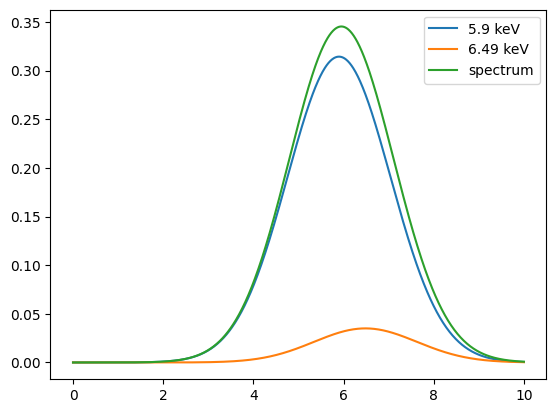

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm
from sklearn.neighbors import KernelDensity

N = 10000
s1p = 5.9
s1std = np.sqrt(0.4-0.1)
s2p = 6.49
s2std = np.sqrt(0.4-0.1)

u = uniform()
n_1 = norm(loc = s1p, scale = s1std)
n_2 = norm(loc = s2p, scale = s2std)
n_f = norm(loc = 0, scale = 0.1)

samplePeakDecider = u.rvs(N)
sample1 = n_1.rvs(N)
sample2 = n_2.rvs(N)
sampleSpectrum = np.where(samplePeakDecider < 0.9, sample1, sample2)

samplef = n_f.rvs(N)

sampleSpectrumF = sampleSpectrum + samplef

res = 1000
x = np.linspace(0,10, res)[:,np.newaxis]
S = [sample1, sample2, sampleSpectrum]
sS = ["5.9 keV", "6.49 keV", "spectrum"]
mod = [0.9, 0.1, 1]
for (s,md) in zip(S,mod):
    m = KernelDensity(kernel="gaussian")
    m.fit(s[:, np.newaxis])
    d = np.exp(m.score_samples(x))
    plt.plot(x,md*d)
plt.legend(sS)